In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import locale as lc
from functools import reduce


# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
data_complete = pd.merge(city_data, ride_data, how="left", on=["city", "city"])
#school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])
data_complete.head(13)
# Display the data table for preview




,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


In [4]:
avg_fare= round(data_complete.groupby(['city','type'], as_index=False)['fare'].mean(),2)
total_rides= round(data_complete.groupby(['city','type'], as_index=False)['ride_id'].count(),2)

avg_fare

,city,type,fare
0,Amandaburgh,Urban,24.64
1,Barajasview,Urban,25.33
2,Barronchester,Suburban,36.42
3,Bethanyland,Suburban,32.96
4,Bradshawfurt,Rural,40.06
5,Brandonfort,Suburban,35.44
6,Carriemouth,Urban,28.31
7,Christopherfurt,Urban,24.50
8,Colemanland,Suburban,30.89
9,Davidfurt,Suburban,32.00


In [5]:
# compile the list of dataframes you want to merge
data_frames = [total_rides, avg_fare]

#merge as needed
scatter_data = reduce(lambda  left,right: pd.merge(left,right,on=['city','type'],
                                            how='left'), data_frames)


scatter_data.head()

,city,type,ride_id,fare
0,Amandaburgh,Urban,18,24.64
1,Barajasview,Urban,22,25.33
2,Barronchester,Suburban,16,36.42
3,Bethanyland,Suburban,18,32.96
4,Bradshawfurt,Rural,10,40.06


## Bubble Plot of Ride Sharing Data

Text(0, 0.5, 'Average Fare')

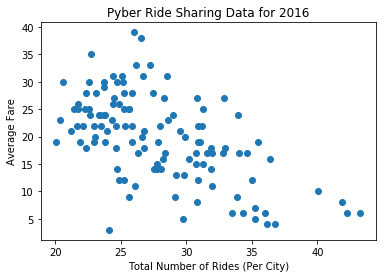

In [11]:
###define dictionary 

# Obtain the x and y coordinates for each of the three city types
avg_fare= data_complete.groupby(['city','type'], as_index=False)['fare'].mean()
total_rides= data_complete.groupby('city', as_index=False)['ride_id'].count()

rng = np.random.RandomState(0)
x = avg_fare['fare']
y = total_rides['ride_id']
colors = rng.rand(1)


# Build the scatter plots for each city types

# ax1 = data_complete.plot.scatter(
#                        x=data_complete.groupby(['city','type'], as_index=False)['fare'].mean(),
#                        y=data_complete.groupby('city', as_index=False)['ride_id'].count(),
#                        c='DarkBlue')

#plt.scatter(x, y, 'o', color='black',s=1,alpha=0.3);

plt.scatter(x, y, marker='o')
plt.title('Pyber Ride Sharing Data for 2016')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare')

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure



In [ ]:

# Show plot
plt.show()

In [ ]:
data_complete.head()

In [ ]:

###basically a dict of functions while will be performed w\ i call dict after groupby 
g = {'fare':sum,'ride_id':pd.Series.nunique}
data_complete.groupby(['city','type']).agg(g).reset_index()


In [8]:
scatter_data2= round(data_complete.groupby(['type'], as_index=False)['fare'].sum(),2)

scatter_data2['total']=ride_data['ride_id'].sum()
scatter_data2['% of Total Fares by City Type']= scatter_data2['fare']/ride_data['fare'].sum()

scatter_data2

#data_complete['% Passing Math'] = round((district_data_complete['math_score_x']/district_data_complete['size'])*100,2)
#

,type,fare,total,% of Total Fares by City Type
0,Rural,4327.93,11607265426974146,0.068115
1,Suburban,19356.33,11607265426974146,0.304639
2,Urban,39854.38,11607265426974146,0.627246


## Total Fares by City Type

([<matplotlib.patches.Wedge at 0x1aa4756e4a8>,
 [Text(1.0749106638891923, 0.23359594315247792, 'Rural'),
  Text(0.2031702810667748, 1.0810743900820368, 'Suburban'),
  Text(-0.42811329447141844, -1.0132714380149224, 'Urban')])

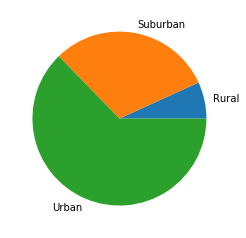

In [9]:
# Calculate Type Percents
plt.pie(scatter_data2['% of Total Fares by City Type'],labels=scatter_data2['type'])
# Build Pie Chart


# Save Figure


In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents
scatter_data2= round(data_complete.groupby(['type'], as_index=False)['fare'].sum(),2)

scatter_data2['total']=ride_data['fare'].sum()
scatter_data2['% of Total Fares by City Type']= scatter_data2['fare']/ride_data['fare'].sum()

scatter_data2

#data_complete['% Passing Math'] = round((district_data_complete['math_score_x']/district_data_complete['size'])*100,2)
#
# Build Pie Chart

# Save Figure


In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


In [ ]:
# Show Figure
plt.show()